In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import plotly.express as px

In [49]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [50]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


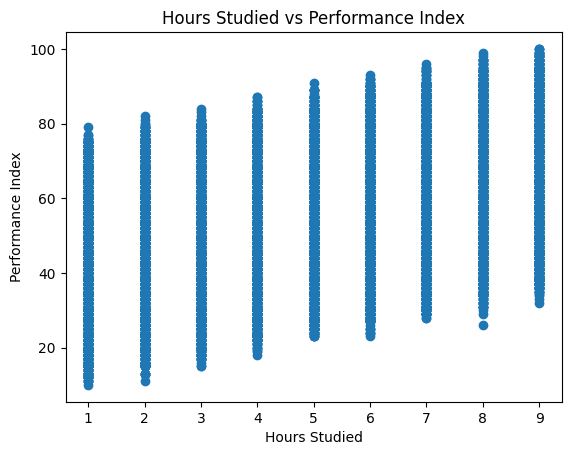

In [132]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Hours Studied vs Performance Index')
plt.show()


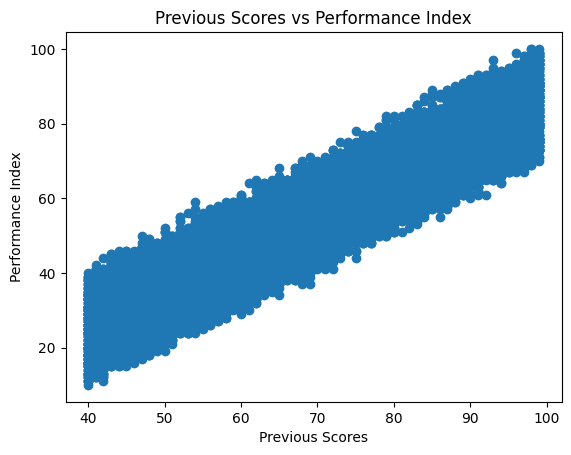

In [133]:
plt.scatter(df['Previous Scores'], df['Performance Index'])
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.title('Previous Scores vs Performance Index')
plt.show()

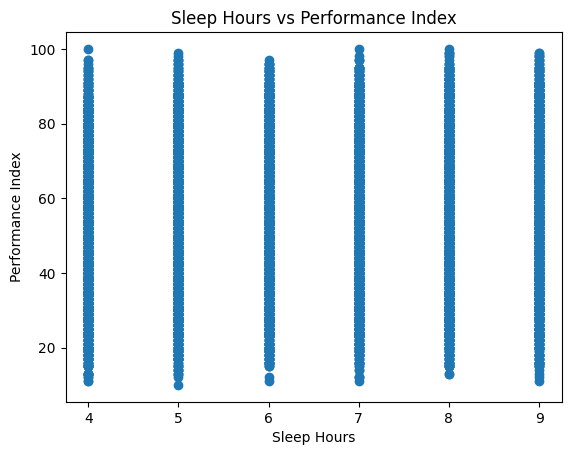

In [134]:
plt.scatter(df['Sleep Hours'], df['Performance Index'])
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.title('Sleep Hours vs Performance Index')
plt.show()


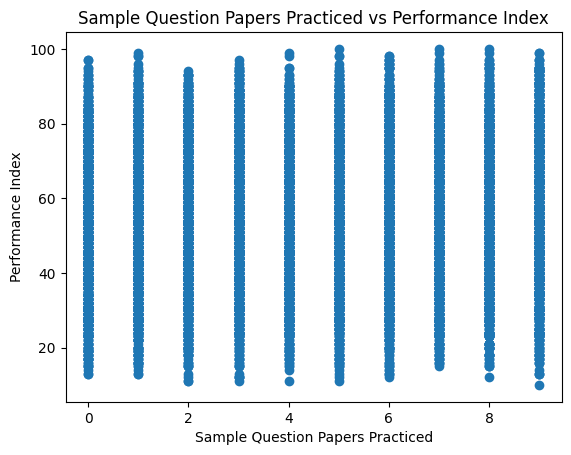

In [135]:
plt.scatter(df['Sample Question Papers Practiced'], df['Performance Index'])
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.show()

In [51]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

#X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [52]:
one_hot_encoded = pd.get_dummies(X['Extracurricular Activities'], prefix='ex_act')
X_ohe = pd.concat([X, one_hot_encoded], axis=1).drop(columns=['Extracurricular Activities'])
X_ohe

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
0,7,99,9,1,False,True
1,4,82,4,2,True,False
2,8,51,7,2,False,True
3,5,52,5,2,False,True
4,7,75,8,5,True,False
...,...,...,...,...,...,...
9995,1,49,4,2,False,True
9996,7,64,8,5,False,True
9997,6,83,8,5,False,True
9998,9,97,7,0,False,True


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.25, random_state=42)

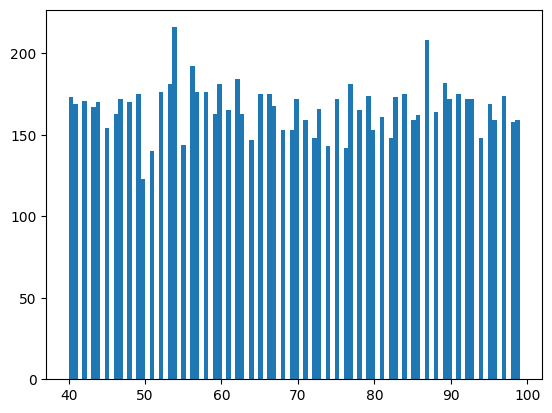

In [65]:
import matplotlib.pyplot as plt

plt.hist(df['Previous Scores'], bins=100)
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

continous_columns = ['Previous Scores']
mm = MinMaxScaler()
X_train[continous_columns] = mm.fit_transform(X_train[continous_columns])
X_test[continous_columns] = mm.transform(X_test[continous_columns])

X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,ex_act_No,ex_act_Yes
4901,5,0.152542,5,5,True,False
4375,7,0.813559,4,9,False,True
6698,3,0.915254,7,1,False,True
9805,9,0.237288,5,9,False,True
1101,4,0.271186,8,6,False,True
...,...,...,...,...,...,...
5734,8,0.169492,6,6,False,True
5191,4,0.474576,9,3,True,False
5390,9,0.135593,7,6,True,False
860,1,0.118644,9,0,True,False


In [6]:
#Realizar la estandarización de datos correspondiente para que los datos tengan la misma escala.
from sklearn.preprocessing import normalize
df_temp = df.drop(columns=['Performance Index', 'Extracurricular Activities'])
df_scaled = normalize(df_temp)
df_scaled = pd.DataFrame(df_scaled, columns=df_temp.columns)

df_scaled['Extracurricular Activities'] = df['Extracurricular Activities']
df_scaled['Performance Index'] = df['Performance Index']
df_scaled.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities,Performance Index
0,0.070239,0.993383,0.090308,0.010034,1,91.0
1,0.048650,0.997334,0.048650,0.024325,0,65.0
2,0.153449,0.978240,0.134268,0.038362,1,45.0
3,0.095208,0.990162,0.095208,0.038083,1,36.0
4,0.092209,0.987955,0.105382,0.065864,0,66.0


## Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
c = lr.intercept_
c

7.077216786766499

In [78]:
m = lr.coef_
m

array([ 2.85492123, 59.96637037,  0.47688351,  0.19092346, -0.29185465,
        0.29185465])

In [79]:
Y_pred_test = lr.predict(X_test)
Y_pred_test

array([54.73187888, 22.61211054, 47.90838844, ..., 68.07396952,
       53.68636805, 54.85816372])

In [80]:
from sklearn.metrics import mean_squared_error

cm = mean_squared_error(y_test, Y_pred_test)
cm

4.03254421541911

In [81]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Y_pred_test)
mape = mae / y_test.mean()
mape

0.029236132222469242

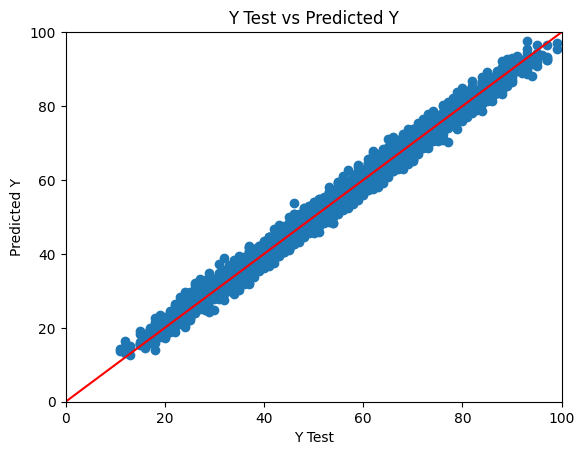

In [75]:
plt.scatter(y_test, Y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()


Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

Y_pred_test_rf = rf.predict(X_test)
Y_pred_test_rf

array([43.7975    , 55.36666667, 41.806     , ..., 68.7725    ,
       35.24      , 18.755     ])

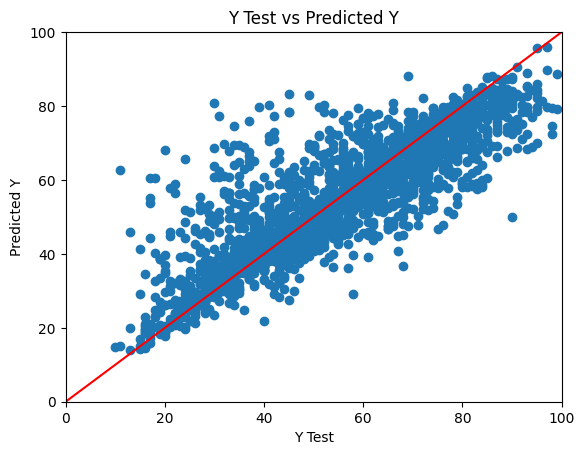

In [140]:
plt.scatter(y_test, Y_pred_test_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()

In [142]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

Y_pred_test_dt = dt.predict(X_test)
Y_pred_test_dt


array([39. , 41. , 44. , ..., 55. , 48. , 17.5])

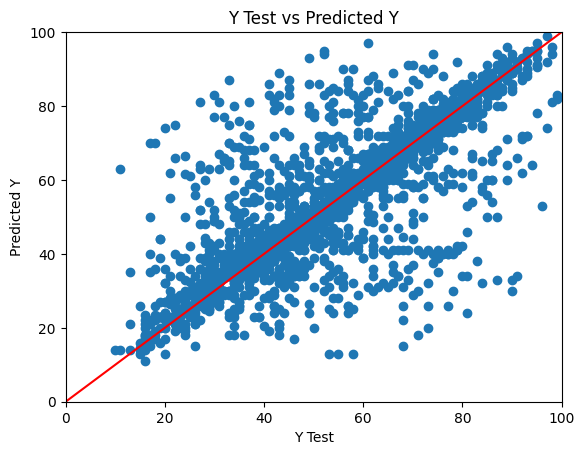

In [143]:
plt.scatter(y_test, Y_pred_test_dt)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('Y Test vs Predicted Y')
plt.plot([0, 100], [0, 100], color='red')
plt.show()